Bu projenin amacı, bu şirketin kredi kartı kullanıcılarının özelliklerine ve tüketim davranışlarına göre gruplandırılarak segmentasyonunun gerçekleştirilmesi, işletmelerin pazarlama stratejilerini özelleştirmeleri ve ürün tekliflerini optimize etmelerini sağlamaktır.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
dosya_yolu = "/workspaces/Bitirme_Projesi/archive (1).zip"
df = pd.read_csv(dosya_yolu)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Veri Setini Keşif Edelim.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

## Açıklayıcı İstatiksel Bilgilere Bakalım.
 Verilerin istatiksel bilgileri numeric ve object tipindeki datalarda farklı bilgiler verir ayrı bir şekilde analiz etmeliyiz.

In [53]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [54]:
df['CLIENTNUM'].dtype

dtype('int64')

In [55]:
numeric_sütunlar = [
    sütun
    for sütun in df.columns
    if df[sütun].dtype in ["int64","float64"]
]
df[numeric_sütunlar]   #numeric sütunlar için sayısal özet istatistiklere ulaşabilirsiniz

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [56]:
object_sütunlar = [
    sütun
    for sütun in df.columns
    if df[sütun].dtype == "O"
]
df[object_sütunlar]  #object sütunlar için ise kategorik verilerin çeşitliliği hakkında bilgi edinebilirsiniz

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [57]:
df[numeric_sütunlar].describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1.438300e+03,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.000000e+00,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.000000e+00,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [58]:
df[object_sütunlar].describe().T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


# Eksik Verileri İnceleyelim.

In [59]:
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Null'] = df.isnull().sum().values
df_info    # Bu kodun amacı, her sütunun veri tipini ve eksik (null) değer sayısını gösteren bir özet oluşturmak.

,Dtype,Null
CLIENTNUM,int64,0
Attrition_Flag,object,0
Customer_Age,int64,0
Gender,object,0
Dependent_count,int64,0
Education_Level,object,0
Marital_Status,object,0
Income_Category,object,0
Card_Category,object,0
Months_on_book,int64,0


In [60]:
eksik_veri_orani = pd.isnull(df).mean() # Her sütunun eksik veri oranını aldık yüzdesel olarak
eksik_veri_orani

CLIENTNUM                                                                                                                             0.0
Attrition_Flag                                                                                                                        0.0
Customer_Age                                                                                                                          0.0
Gender                                                                                                                                0.0
Dependent_count                                                                                                                       0.0
Education_Level                                                                                                                       0.0
Marital_Status                                                                                                                        0.0
Income_Category                   

In [61]:
with pd.option_context(
    "display.float_format",
    "{:.2f}".format,   # Bu ayar, sayısal verilerin virgülden sonra iki basamağa yuvarlanmasını sağlar.
    "display.max_columns", # Bu ayar, DataFrame'deki tüm sütunları göstermek için kullanılır.
    None,
):
    display(df.describe())  # display() fonksiyonu, Jupyter gibi ortamlar için çıktı ekranında düzgün bir şekilde görüntülenmesini sağlar.

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,739177606.33,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27,0.16,0.84
std,36903783.45,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28,0.37,0.37
min,708082083.00,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00,0.00,0.00
25%,713036770.50,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02,0.00,1.00
50%,717926358.00,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18,0.00,1.00
75%,773143533.00,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50,0.00,1.00
max,828343083.00,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00,1.00,1.00


# Veri Temizleme

In [62]:
df_cleaned = df.drop(df.columns[-2:], axis=1)

print("\nSon İki Sütun Kaldırılmış DataFrame:")   # Son iki sütunu kaldırırız.
df_cleaned


Son İki Sütun Kaldırılmış DataFrame:


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [63]:
df_filtered = df[df['Income_Category'].isin(['Unknown',None]) & df['Education_Level'].isin(['Unknown',None])]

print("\nUnknown ve Boş Değerler Filtrelenmiş Veri:")
print(df_filtered)            
# Bu method ile bilinmeyen eğitim seviyesi ve bilinmeyen gelir seviyesini filtreledik.


Unknown ve Boş Değerler Filtrelenmiş Veri:
      CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
94    715550508  Existing Customer            45      F                3   
101   713843283  Existing Customer            41      F                3   
432   717916758  Existing Customer            67      F                0   
498   772735758  Existing Customer            44      M                1   
547   721057758  Existing Customer            61      F                1   
...         ...                ...           ...    ...              ...   
9695  712441308  Attrited Customer            41      F                4   
9792  712337208  Existing Customer            59      F                2   
9893  719329983  Existing Customer            42      F                3   
9951  715150983  Attrited Customer            44      F                3   
9956  804670758  Existing Customer            48      F                5   

     Education_Level Marital_Status Income_

In [64]:
df = df.drop(df[(df['Income_Category'] == 'Unknown') & (df['Education_Level'] == 'Unknown')].index)

df    # Burada aynı işlemi daha farklı bir yoldan yaptık.


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# Müşteri Profiline Genel Bir Bakış 

 1. Yaş_Kategorisi
 2. Gelir_Kategorisi
 3. Medeni_Durum 
 4. Kart_Kategorisi 'ne göre analiz yapalım.


# Yaş Kategorisi İnceleyelim

In [65]:
df['Customer_Age'].value_counts()

Customer_Age
49    491
44    490
46    483
45    479
47    472
43    467
48    464
50    443
42    419
51    396
53    385
41    374
52    371
40    358
39    330
54    304
38    300
55    274
56    260
37    256
57    221
36    218
35    179
58    155
59    152
34    146
60    126
33    125
32    105
65     97
61     91
62     91
31     88
26     72
30     70
63     65
29     55
64     42
27     32
28     27
67      3
66      2
68      2
70      1
73      1
Name: count, dtype: int64

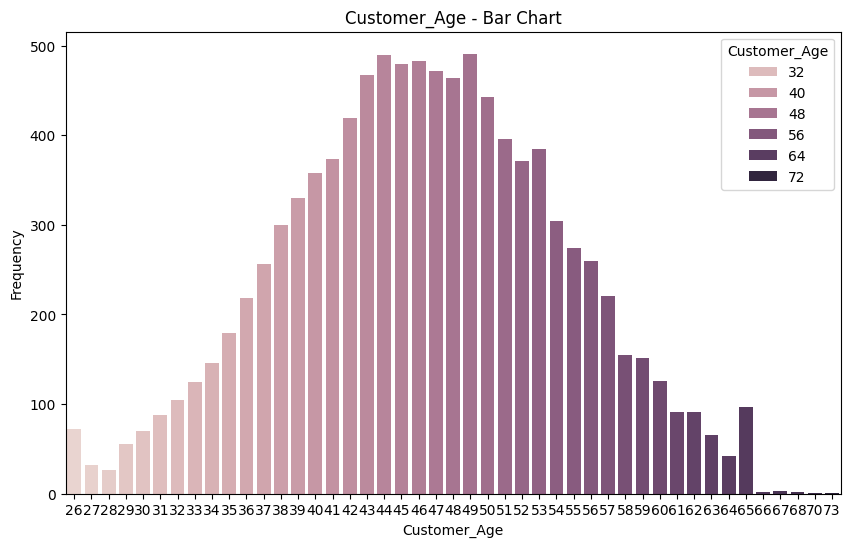

In [66]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Customer_Age', hue='Customer_Age') # Burada x değişkeninin Customer_Age olduğunu belirtmek yerine hue parametresi kullanılıyor.
plt.title('Customer_Age - Bar Chart')
plt.xlabel('Customer_Age')
plt.ylabel('Frequency')
plt.show()

# Gelir Kategorisi İnceleyelim

In [67]:
df['Income_Category'].value_counts()  # Burada Income_Category sütunundaki değerlerin kaç kere geçtiğini gösterir.

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown            967
$120K +            727
Name: count, dtype: int64

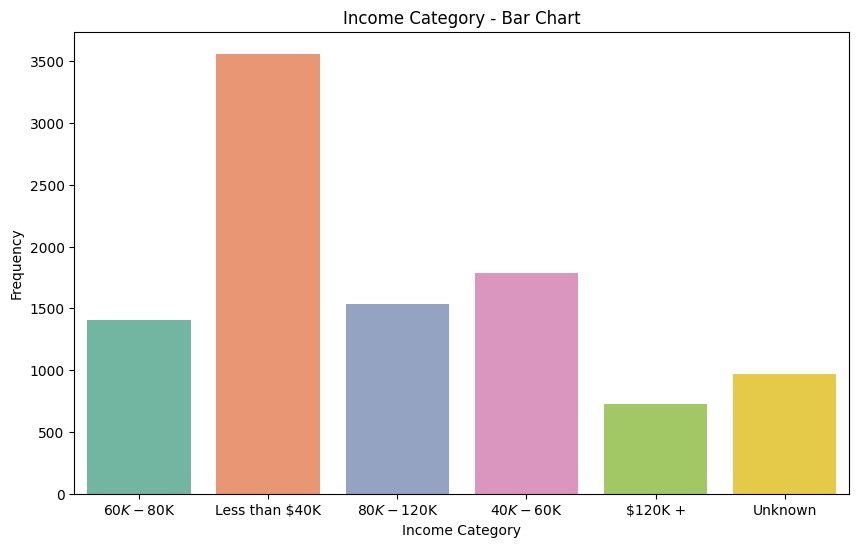

In [68]:
# Renk paleti - 5 renk seçiyoruz
color_palette = sns.color_palette("Set2", 6)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Income_Category', hue='Income_Category', palette=color_palette) # Burada x değişkeninin Income_Category olduğunu belirtmek yerine hue parametresi kullanılıyor.
plt.title('Income Category - Bar Chart')
plt.xlabel('Income Category')
plt.ylabel('Frequency')
plt.show()

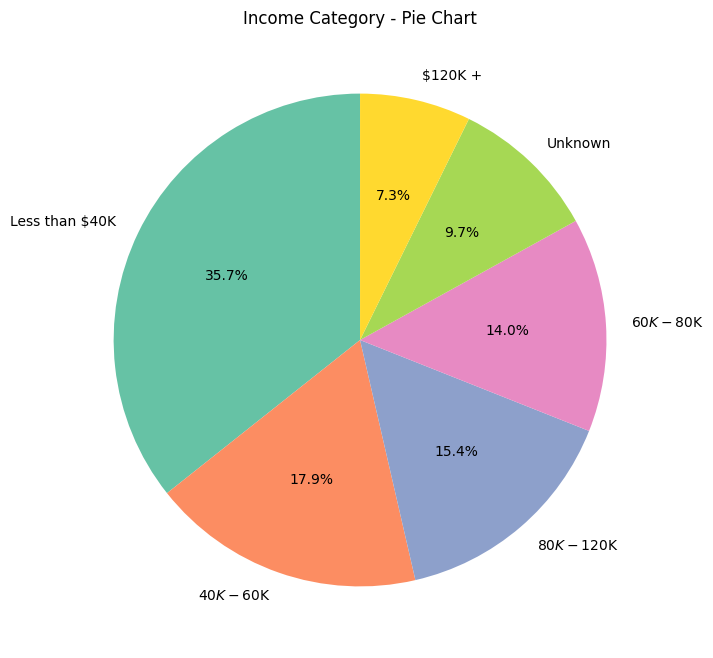

In [69]:
#  Pie Grafiği Oluşturalım.
plt.figure(figsize=(8, 8))
df['Income_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=color_palette, startangle=90)
plt.title('Income Category - Pie Chart')
plt.ylabel('')  # Pie chart'ta label'ı gizleyelim
plt.show()

Grafikleri incelediğimizde $40K'dan az maaş alanların çoğunlukda olduğunu görmekteyiz.

In [70]:
# Gelir ve kart kategorilerinin bir arada gösterilmesi
# 1. Kart kategorilerine ve gelir seviyelerine göre veri gruplama
card_income_group = df.groupby(['Card_Category', 'Income_Category']).size().reset_index(name='Customer_Count')

# 2. Sonuçları yazdır
print(card_income_group)

# 3. Örnek olarak sadece 'less than $40K' gelir seviyesindeki kart kategorilerini filtreleme
filtered_result = card_income_group[card_income_group['Income_Category'] == 'Less than $40K']

# 4. Sonuçları yazdır
print("\nGeliri $40K'dan az olan kart kategorileri:")
print(filtered_result)

   Card_Category Income_Category  Customer_Count
0           Blue         $120K +             645
1           Blue     $40K - $60K            1675
2           Blue     $60K - $80K            1273
3           Blue    $80K - $120K            1395
4           Blue  Less than $40K            3403
5           Blue         Unknown             910
6           Gold         $120K +              18
7           Gold     $40K - $60K              15
8           Gold     $60K - $80K              29
9           Gold    $80K - $120K              21
10          Gold  Less than $40K              24
11          Gold         Unknown               8
12      Platinum         $120K +               4
13      Platinum     $40K - $60K               1
14      Platinum     $60K - $80K               4
15      Platinum    $80K - $120K               2
16      Platinum  Less than $40K               4
17      Platinum         Unknown               5
18        Silver         $120K +              60
19        Silver    

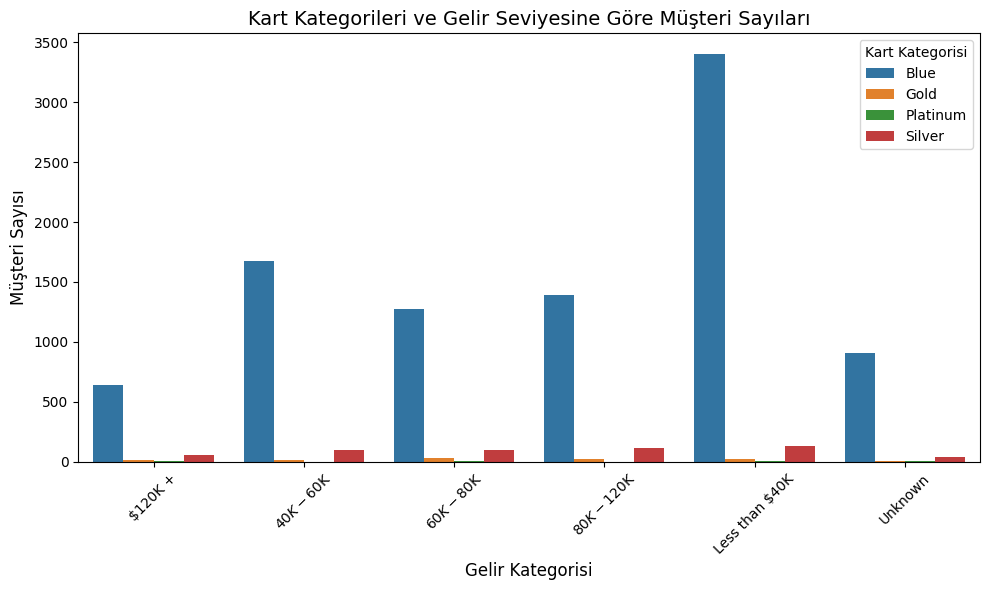

In [71]:
# 1. Kart kategorileri ve gelir kategorilerini gruplayalım
card_income_group = df.groupby(['Card_Category', 'Income_Category']).size().reset_index(name='Customer_Count')

# 2. Çubuk grafikle görselleştirelim
plt.figure(figsize=(10, 6))
sns.barplot(data=card_income_group, x='Income_Category', y='Customer_Count', hue='Card_Category')

# 3. Grafik başlıkları ve etiketleri
plt.title('Kart Kategorileri ve Gelir Seviyesine Göre Müşteri Sayıları', fontsize=14)
plt.xlabel('Gelir Kategorisi', fontsize=12)
plt.ylabel('Müşteri Sayısı', fontsize=12)
plt.xticks(rotation=45)  # X eksenindeki etiketleri döndürmek
plt.legend(title='Kart Kategorisi')

# 4. Grafiği göster
plt.tight_layout()  # Grafik sıkışık olmasın diye
plt.show()

# Evlilik Durumlarını İnceleyelim

In [72]:
# Evlilik durumlarını inceleyelim.
df['Marital_Status'].value_counts()

Marital_Status
Married     4629
Single      3873
Unknown      742
Divorced     738
Name: count, dtype: int64

In [73]:
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced'], 'Single') #Burada replace methodu ile Divorced olan verileri Single olarak güncelledik.

/tmp/ipykernel_21419/3431483017.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(data=df, x='Marital_Status', hue='Marital_Status', palette=color_palette) # Burada x değişkeninin Marital_Status olduğunu belirtmek yerine hue parametresi kullanılıyor.


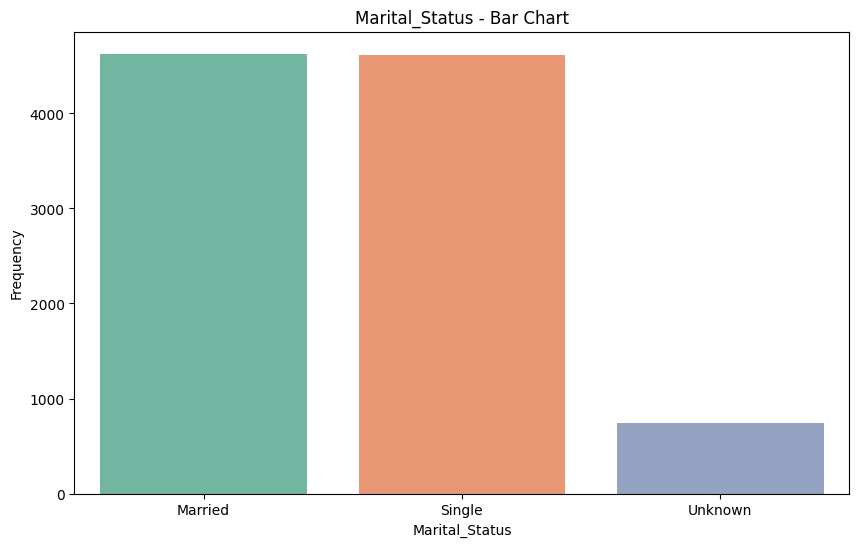

In [74]:
color_palette = sns.color_palette("Set2", 6)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital_Status', hue='Marital_Status', palette=color_palette) # Burada x değişkeninin Marital_Status olduğunu belirtmek yerine hue parametresi kullanılıyor.
plt.title('Marital_Status - Bar Chart')
plt.xlabel('Marital_Status')
plt.ylabel('Frequency')
plt.show()

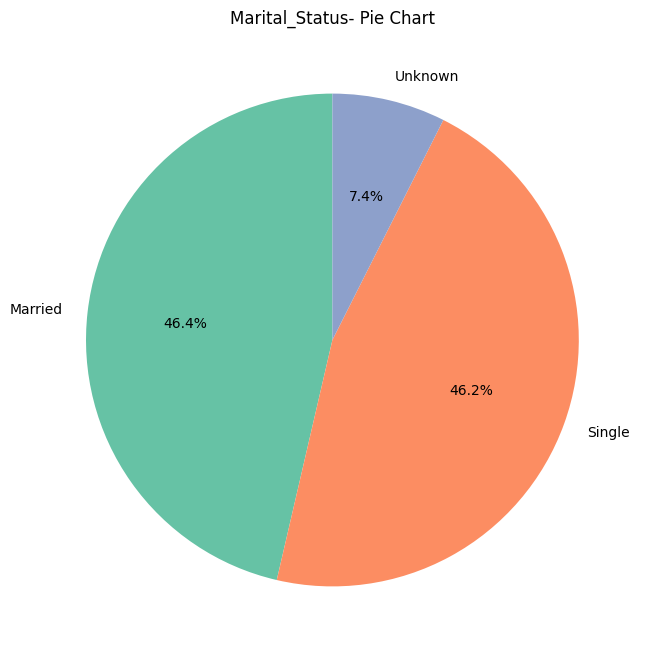

In [75]:
#  Pie Grafiği Oluşturalım.
plt.figure(figsize=(8, 8))
df['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=color_palette, startangle=90)
plt.title('Marital_Status- Pie Chart')
plt.ylabel('')  # Pie chart'ta label'ı gizleyelim
plt.show()

Evli ve bekar oranlarını birbirine yakın diyebiliriz.

# Kart Kategorilerini İnceleyelim

In [76]:
# Card_Category inceleyelim
df['Card_Category'].value_counts()

Card_Category
Blue        9301
Silver       546
Gold         115
Platinum      20
Name: count, dtype: int64

/tmp/ipykernel_21419/3858626767.py:4: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(data=df, x='Card_Category', hue='Card_Category', palette=color_palette) # Burada x değişkeninin Card_Category olduğunu belirtmek yerine hue parametresi kullanılıyor.


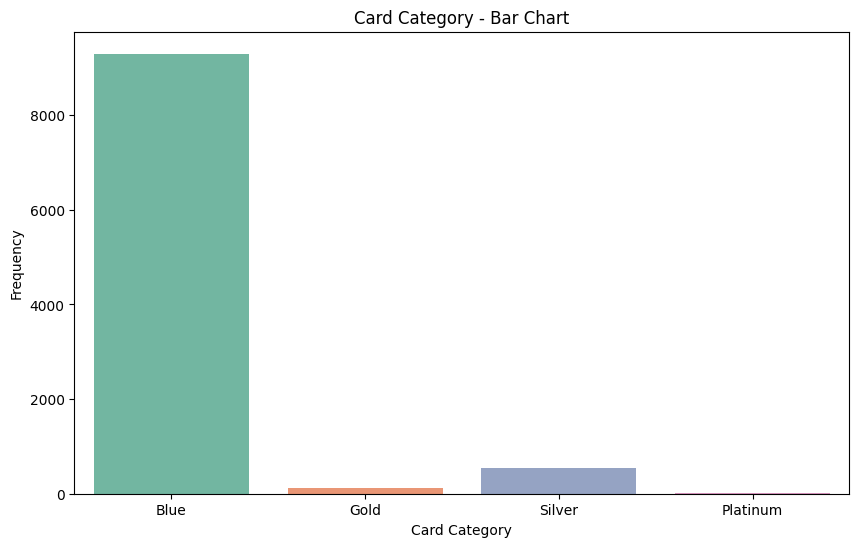

In [77]:
color_palette = sns.color_palette("Set2", 6)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Card_Category', hue='Card_Category', palette=color_palette) # Burada x değişkeninin Card_Category olduğunu belirtmek yerine hue parametresi kullanılıyor.
plt.title('Card Category - Bar Chart')
plt.xlabel('Card Category')
plt.ylabel('Frequency')
plt.show()

Mavi kart sahiplerinin çoğunlukda olduğunu görmekteyiz.

# Sayısal Sütunların Genel Bir Görselleştirmesini Yapalım

<Axes: >

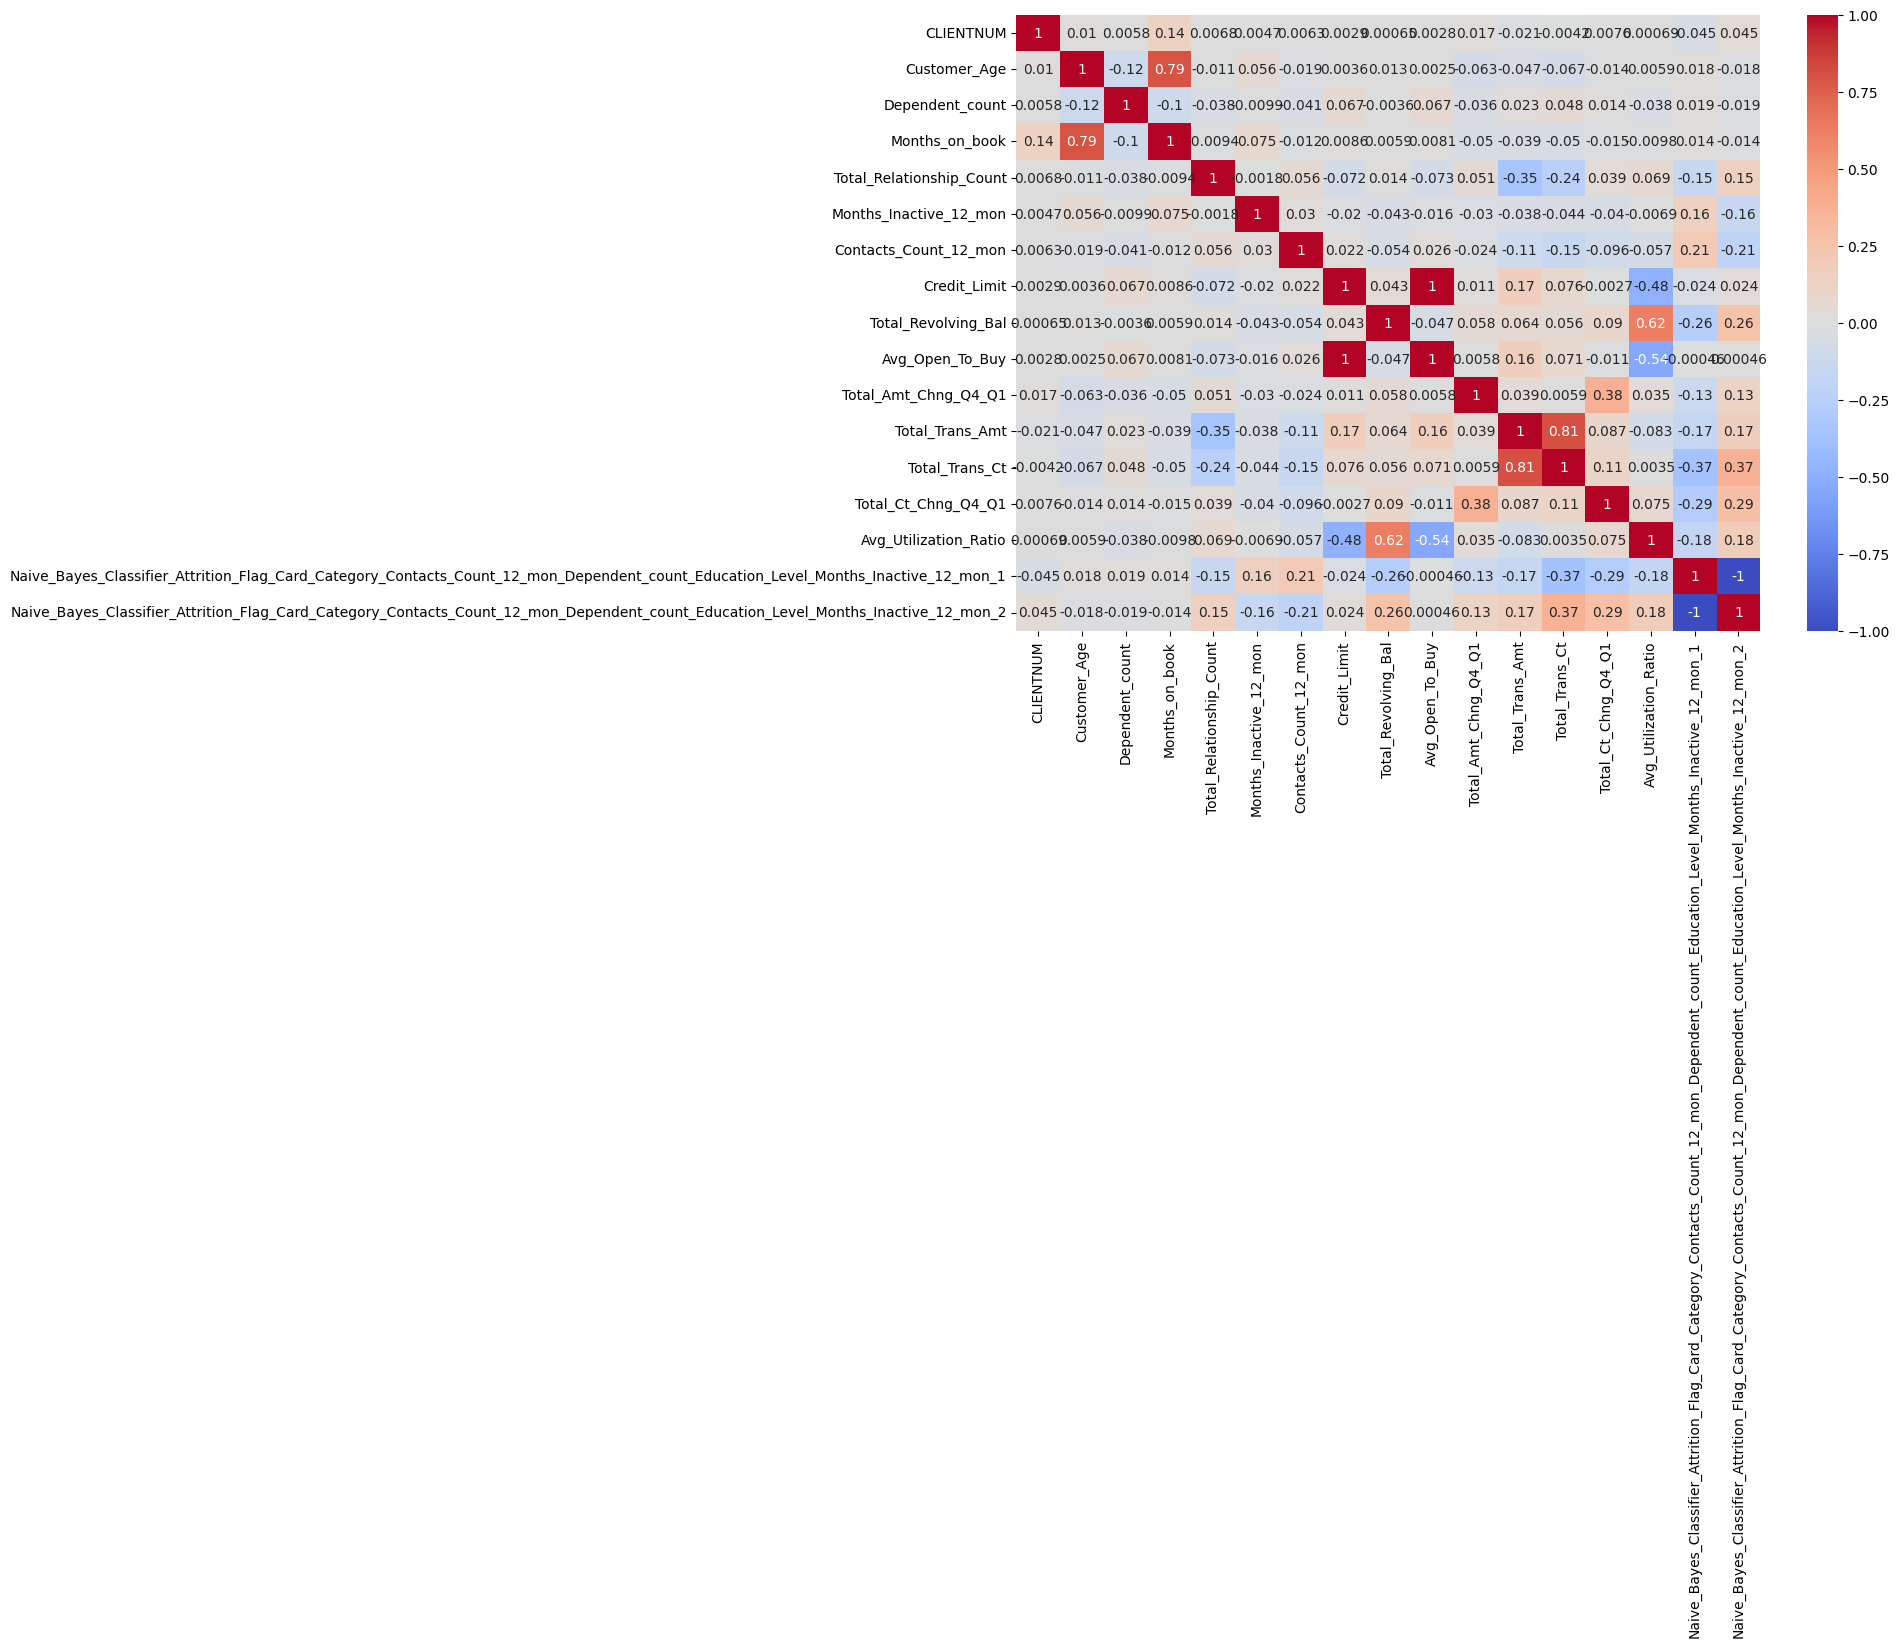

In [78]:
#Korelasyon Matrisi
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_sütunlar].corr(), annot =True, cmap = 'coolwarm')

# Mevcut ve Yıpranma Müşteri Oranını İnceleyelim

In [79]:
unique_value=df['Attrition_Flag'].unique()
unique_value #Attrition_Flag sütunundaki tüm kategorilerin ne olduğunu görürüz.

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [80]:
# 1. 'Attrited Customer' olan müşterilerin sayısını al
attrited_customer = df[df['Attrition_Flag'] == 'Attrited Customer']

# 2. Toplam müşteri sayısını al
total_customers = len(df)

# 3. Yıpranma oranını hesapla
attrited_rate = (len(attrited_customer) / total_customers) * 100

# 4. Sonucu yazdır
print(f"Yıpranma Oranı: {attrited_rate:.2f}%")

Yıpranma Oranı: 16.03%


In [81]:
# 1. Mevcut müşteri veri çerçevesi
existing_customer = df[df['Attrition_Flag'] == 'Existing Customer']

# 2. Mevcut müşteri sayısı
num_existing_customer = len(existing_customer)

# 3. Toplam müşteri sayısı
total_customers = len(df)

# 4. Mevcut müşterilerin yüzdesi
yüzde_existing = (num_existing_customer / total_customers) * 100

# 5. Sonucu yazdır
print(f'Mevcut Müşterilerin Yüzdesi: {yüzde_existing:.2f}%')

Mevcut Müşterilerin Yüzdesi: 83.97%


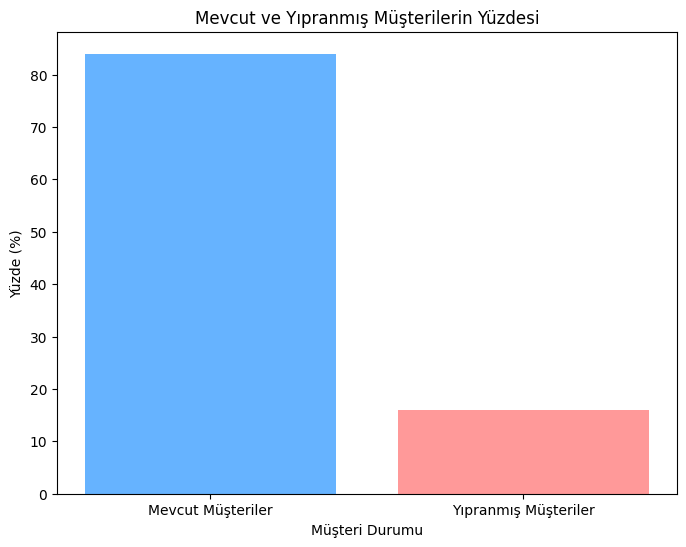

In [82]:
# 6. Veriyi çubuk grafiği için hazırlama
labels = ['Mevcut Müşteriler', 'Yıpranmış Müşteriler']
sizes = [yüzde_existing, attrited_rate]
colors = ['#66b3ff', '#ff9999']  # Renkler

# 7. Çubuk grafiği çizme
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=colors)

# 8. Başlık ve etiketler ekleme
plt.title('Mevcut ve Yıpranmış Müşterilerin Yüzdesi')
plt.xlabel('Müşteri Durumu')
plt.ylabel('Yüzde (%)')

# 9. Grafiği gösterme
plt.show()

**1- Mavi Kart sahiplerinin sayısı ve yıllık geliri $40K'ın altında olanların yüzdesini inceleyelim.**

In [83]:
# 1. Mavi kart sahiplerini ve gelir kategorisi "Less than $40K" olanları filtrele
filtered_data = df[(df['Card_Category'] == 'Blue') & (df['Income_Category'] == 'Less than $40K')]

# 2. Mavi kart sahiplerinin ve geliri $40K'dan az olanların sayısını al
blue_card_under_40k_count = len(filtered_data)

# 3. Toplam müşteri sayısını al
total_customers = len(df)

# 4. Mavi kart sahiplerinin ve gelir kategorisi $40K'dan az olanların yüzdesini hesapla
percentage_blue_under_40k = (blue_card_under_40k_count / total_customers) * 100

# 5. Sonuçları yazdır
print(f'Mavi Kart Sahiplerinin Sayısı ve Geliri $40K Altında Olanların Sayısı: {blue_card_under_40k_count}')
print(f'Mavi Kart Sahiplerinin Geliri $40K Altında Olanların Yüzdesi: {percentage_blue_under_40k:.2f}%')

Mavi Kart Sahiplerinin Sayısı ve Geliri $40K Altında Olanların Sayısı: 3403
Mavi Kart Sahiplerinin Geliri $40K Altında Olanların Yüzdesi: 34.09%


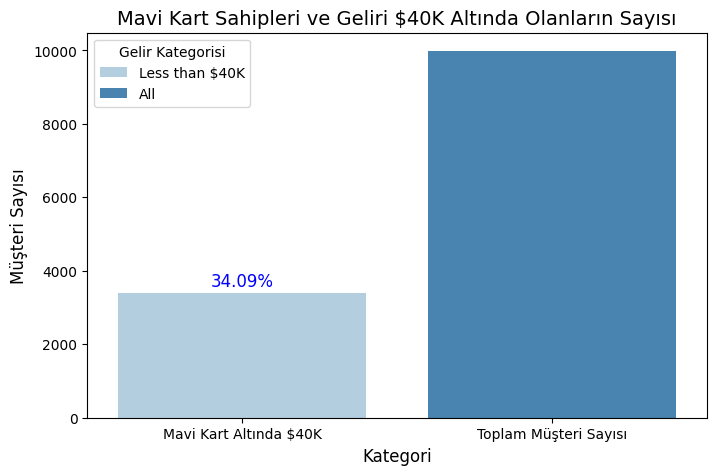

In [84]:
# 6. Görselleştirme için veriyi yeniden yapılandırıyoruz
# Gelir kategorisini ve müşteri sayısını bir DataFrame'e dönüştürelim
promo_data = pd.DataFrame({
    'Kategori': ['Mavi Kart Altında $40K', 'Toplam Müşteri Sayısı'],
    'Müşteri Sayısı': [blue_card_under_40k_count, total_customers],
    'Gelir Kategorisi': ['Less than $40K', 'All']  # Burada 'All' tüm veriyi ifade eder
})

# Çubuk grafiği oluşturma
plt.figure(figsize=(8, 5))
sns.barplot(x='Kategori', y='Müşteri Sayısı', data=promo_data, hue='Gelir Kategorisi', palette='Blues')

# Başlık ve etiketler
plt.title('Mavi Kart Sahipleri ve Geliri $40K Altında Olanların Sayısı', fontsize=14)
plt.ylabel('Müşteri Sayısı', fontsize=12)
plt.xlabel('Kategori', fontsize=12)

# Yüzdeyi metin olarak ekleme
plt.text(0, blue_card_under_40k_count + 50, f'{percentage_blue_under_40k:.2f}%', 
         ha='center', va='bottom', fontsize=12, color='blue')

# Grafik gösterme
plt.show()

**2. En yüksek kayıp oranı $40K - $80K gelir aralığında Altın Kart
sahiplerinde gözlemlendi, yıpranma oranını inceleyelim.**

In [85]:
# Benzersiz Card_Category değerlerini kontrol et
print(df['Card_Category'].unique())

# Benzersiz Income_Category değerlerini kontrol et
print(df['Income_Category'].unique())

['Blue' 'Gold' 'Silver' 'Platinum']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


In [86]:
# 1. Altın kart sahiplerini ve gelir aralığı "$40K - $80K" olanları filtrele
filtered_data = df[(df['Card_Category'] == 'Gold') & (df['Income_Category'] == '$40K - $80K')]

# 2. Eğer bu grup boşsa, sıfır bölme hatasını önlemek için kontrol et
if len(filtered_data) == 0:
    print("Veri setinde Altın Kart sahipleri ve $40K - $80K gelir aralığında müşteri bulunmamaktadır.")
else:
    # 3. Altın kart sahiplerinin toplam sayısını al
    total_gold_customers = len(filtered_data)

    # 4. Kayıp müşterileri (Churned) filtrele
    churned_customers = filtered_data[filtered_data['Attrition_Flag'] == 'Attrited Customer']

    # 5. Kayıp müşteri sayısını al
    churned_count = len(churned_customers)

    # 6. Kayıp oranını hesapla
    attrited_customer_rate = (churned_count / total_gold_customers) * 100

    # 7. Altın Kart sahiplerinin toplam sayısını yazdır
    print(f"Altın Kart Sahiplerinin Toplam Sayısı (Gelir $40K - $80K): {total_gold_customers}")

    # 8. Kayıp oranını yazdır
    print(f"Altın Kart Sahiplerinde, $40K - $80K gelir aralığındaki Kayıp Oranı: {attrited_customer_rate:.2f}%")

Veri setinde Altın Kart sahipleri ve $40K - $80K gelir aralığında müşteri bulunmamaktadır.


**3. Kayıp oranı yüksek olan müşteriler genellikle son 12 ayda banka ile daha
fazla iletişim kurmuş,kayıp oranı ve banka ile iletişim sayısını bulalım.**

In [87]:
# 1. Kayıp müşterileri (Churned) filtrele
churned_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# 2. Kayıp müşteri sayısını al
churned_count = len(churned_customers)

# 3. Toplam müşteri sayısını al
total_customers = len(df)

# 4. Kayıp oranını hesapla
attrition_rate = (churned_count / total_customers) * 100

# 5. Kayıp müşterilerin son 12 ayda iletişim sayısını ortalama olarak hesapla
avg_contacts_churned = churned_customers['Contacts_Count_12_mon'].mean()

# 6. Sonuçları yazdır
print(f"Kayıp Oranı: {attrition_rate:.2f}%")
print(f"Kayıp Müşterilerin Ortalama İletişim Sayısı (Son 12 Ay): {avg_contacts_churned:.2f}")

Kayıp Oranı: 16.03%
Kayıp Müşterilerin Ortalama İletişim Sayısı (Son 12 Ay): 2.97


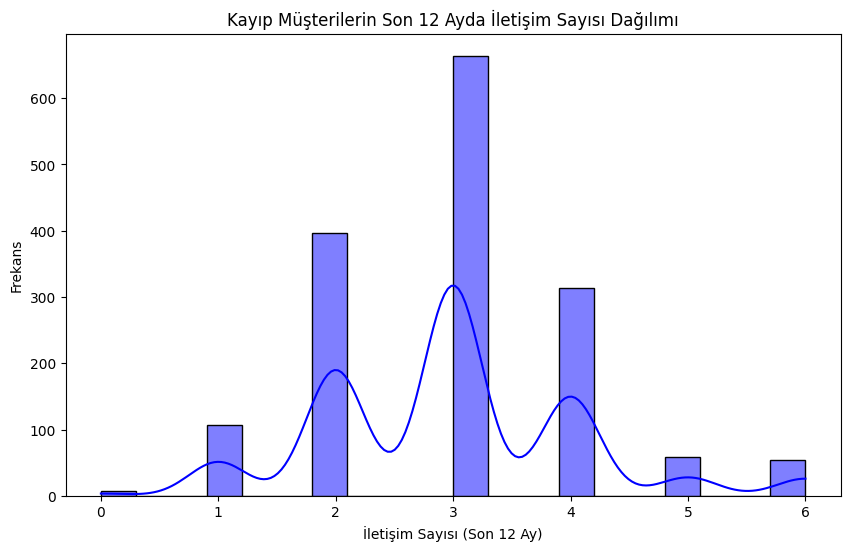

In [88]:
# Kayıp müşterilerin iletişim sayısının dağılımını görselleştir
plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['Contacts_Count_12_mon'], kde=True, color='blue', bins=20)
plt.title('Kayıp Müşterilerin Son 12 Ayda İletişim Sayısı Dağılımı')
plt.xlabel('İletişim Sayısı (Son 12 Ay)')
plt.ylabel('Frekans')
plt.show()


**Gelir Tipine Ve Kredi Kartı Türüne Göre Yıpranma Oranını İnceleyelim.**

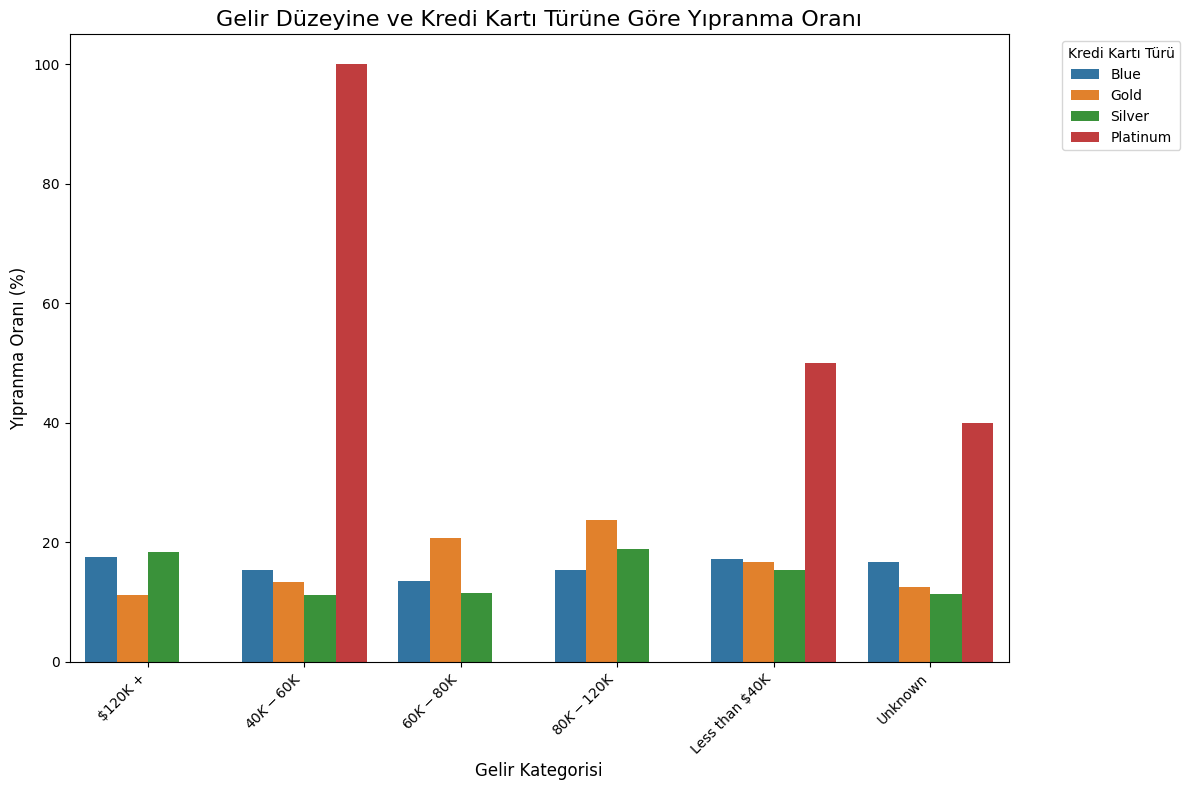

In [89]:
# 1. Yıpranmış (churned) müşterileri filtrele
churned_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# 2. Gelir kategorisi ve kart türüne göre gruplama yap ve kayıp oranını hesapla
grouped_data = churned_customers.groupby(['Income_Category', 'Card_Category']).size().reset_index(name='Churned_Count')

# 3. Her grup için toplam müşteri sayısını hesapla
total_customers_per_group = df.groupby(['Income_Category', 'Card_Category']).size().reset_index(name='Total_Count')

# 4. Kayıp oranını hesapla (kayıp müşteri sayısı / toplam müşteri sayısı * 100)
merged_data = pd.merge(grouped_data, total_customers_per_group, on=['Income_Category', 'Card_Category'])
merged_data['Churn_Rate'] = (merged_data['Churned_Count'] / merged_data['Total_Count']) * 100

# 5. Sonuçları görselleştir
plt.figure(figsize=(12, 8))
sns.barplot(data=merged_data, x='Income_Category', y='Churn_Rate', hue='Card_Category')

# 6. Başlık ve etiketleri ekle
plt.title('Gelir Düzeyine ve Kredi Kartı Türüne Göre Yıpranma Oranı', fontsize=16)
plt.xlabel('Gelir Kategorisi', fontsize=12)
plt.ylabel('Yıpranma Oranı (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # X eksenindeki etiketlerin daha okunabilir olması için döndürme

plt.legend(title='Kredi Kartı Türü', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 7. Görselleştirmeyi göster
plt.show()

-- 40k-80k arasında en yüksek yıpranma oranı platinum kartta olduğunu söyleyebiliriz.


**Yıpranmış Müşterilerin Kart Tipine Ve Gelir Kategorilerine Göre İletişim Sayısını İnceleyelim.**

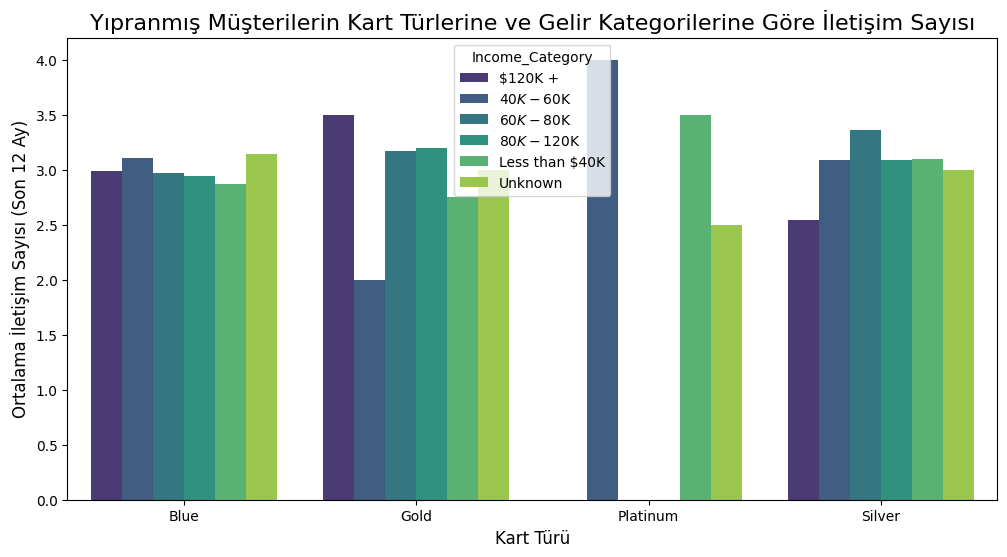

In [90]:
# 1. Çekilen (yıpranmış) müşterileri filtrele
churned_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# 2. Kart türü ve gelir kategorisine göre grupla, iletişim sayısının ortalamasını al
churned_contacts = churned_customers.groupby(['Card_Category', 'Income_Category'])['Contacts_Count_12_mon'].mean().reset_index()

# 3. Çubuk grafiği oluştur (hue parametresi ile 'Income_Category' ekleyelim)
plt.figure(figsize=(12,6))
sns.barplot(x='Card_Category', y='Contacts_Count_12_mon', hue='Income_Category', data=churned_contacts, palette='viridis')

# 4. Grafiği başlıklandır
plt.title('Yıpranmış Müşterilerin Kart Türlerine ve Gelir Kategorilerine Göre İletişim Sayısı', fontsize=16)
plt.xlabel('Kart Türü', fontsize=12)
plt.ylabel('Ortalama İletişim Sayısı (Son 12 Ay)', fontsize=12)

# 5. Grafiği göster
plt.show()

--Bu grafik bize, Altın (Gold) ve Platinum kart sahiplerinin, yıpranmış müşterilerle daha fazla iletişime geçildiğini gösterir.Ayrıca, bu tür yüksek iletişim sayıları, bankaların müşterilerinin ihtiyaçlarını daha iyi anlamaları ve onları elde tutmak için daha fazla çaba göstermeleri gerektiğini de gösterebilir.

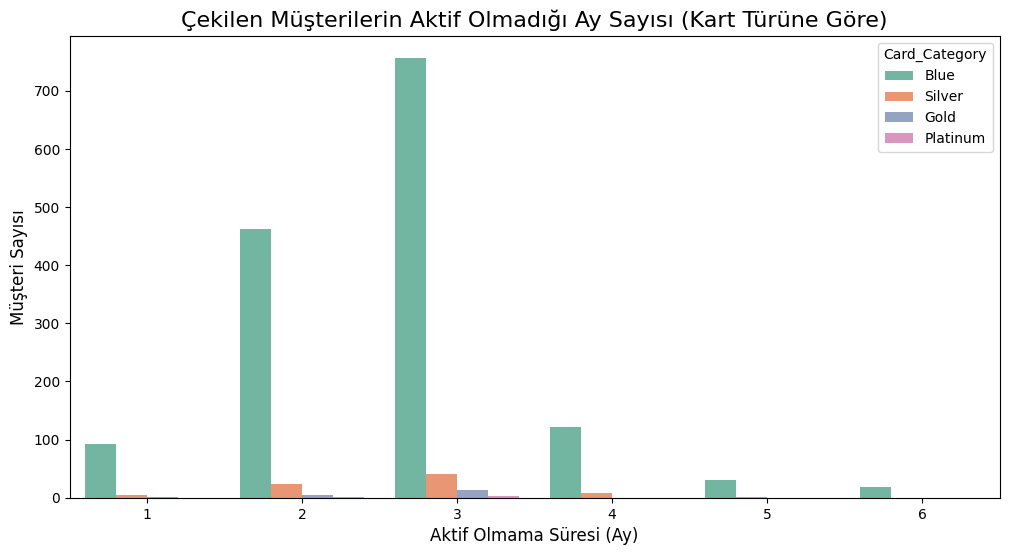

In [91]:
# 1. Çekilen (yıpranmış) müşterileri filtrele
churned_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# 2. Aktif olmayan müşteri sayısını filtrele
inactive_customers = churned_customers[churned_customers['Months_Inactive_12_mon'] > 0]

# 3. Çubuk grafik oluştur, hue ile 'Card_Category' ekleyelim
plt.figure(figsize=(12,6))
sns.countplot(x='Months_Inactive_12_mon', data=inactive_customers, hue='Card_Category', palette='Set2')

# 4. Grafiği başlıklandır
plt.title('Çekilen Müşterilerin Aktif Olmadığı Ay Sayısı (Kart Türüne Göre)', fontsize=16)
plt.xlabel('Aktif Olmama Süresi (Ay)', fontsize=12)
plt.ylabel('Müşteri Sayısı', fontsize=12)

# 5. Grafiği göster
plt.show()

--Bu grafik, kart türlerine göre yıpranmış müşterilerin aktif olmama sürelerini gösterir. Eğer bir kart türü için aktif olmayan müşteri sayısı fazla ise, bu, o kart türü sahiplerinin bankayla etkileşimi azaltmış ve dolayısıyla yıpranma oranlarının arttığını gösterebilir. Bu sayede bankalar, hangi kart türlerinin daha fazla dikkat gerektirdiğini anlayabilir.

**Yıpranmış Müşterierin Kart Türüne Göre Döner Bakiye Dağılımını İnceleyelim**

/tmp/ipykernel_21419/2903419339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Card_Category', y='Total_Revolving_Bal', data=churned_customers, palette='Set1')


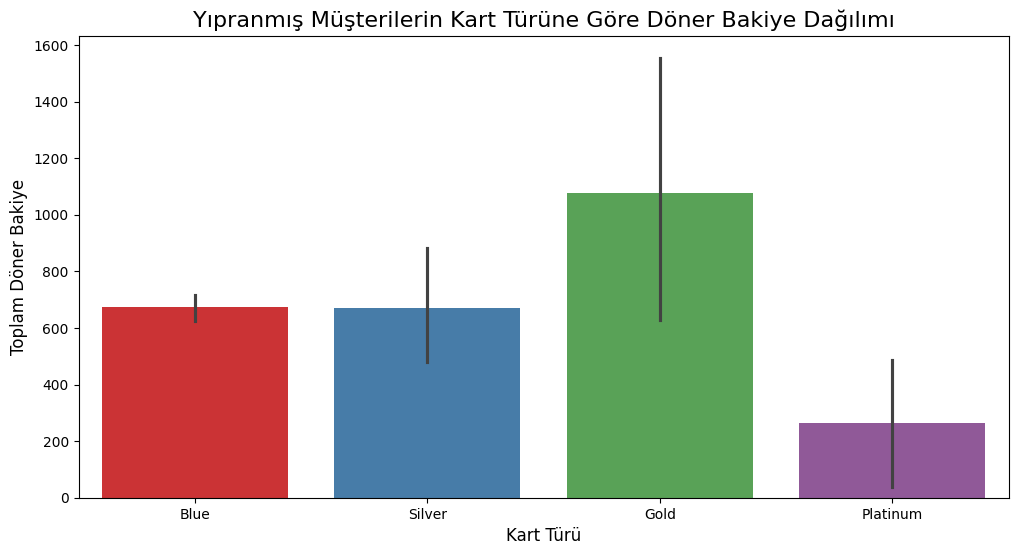

In [92]:
# 1. Çekilen (yıpranmış) müşterileri filtrele
churned_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# 2. Çekilen müşterilerin döner bakiyesini gösteren çubuk grafiği oluştur
plt.figure(figsize=(12,6))
sns.barplot(x='Card_Category', y='Total_Revolving_Bal', data=churned_customers, palette='Set1')

# 3. Grafiği başlıklandır
plt.title('Yıpranmış Müşterilerin Kart Türüne Göre Döner Bakiye Dağılımı', fontsize=16)
plt.xlabel('Kart Türü', fontsize=12)
plt.ylabel('Toplam Döner Bakiye', fontsize=12)

# 4. Grafiği göster
plt.show()

<Axes: xlabel='Card_Category', ylabel='Total_Revolving_Bal'>

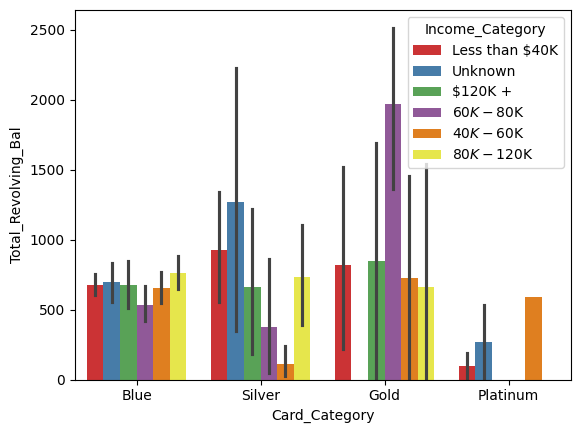

In [93]:
sns.barplot(x='Card_Category', y='Total_Revolving_Bal', data=churned_customers, hue='Income_Category', palette='Set1')

**Farklı Kart Türlerine Sahip Mevcut Ve Çekilen Müşterilerin Kredi Limitleri**

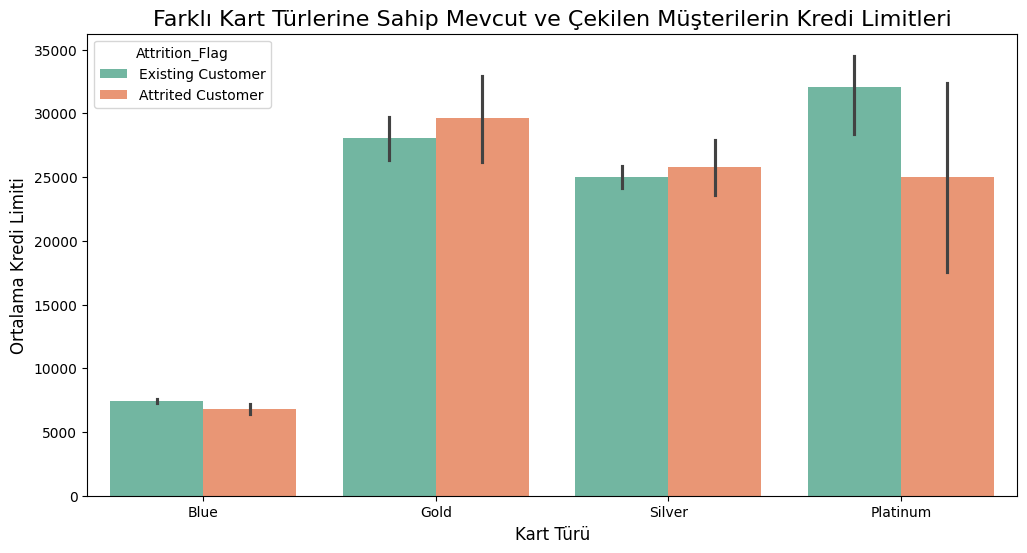

In [94]:
# 1. Mevcut ve çekilen müşterileri filtrele
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']
churned_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# 2. Her iki grubu birleştir
merged_data = pd.concat([existing_customers[['Card_Category', 'Credit_Limit', 'Attrition_Flag']],
                         churned_customers[['Card_Category', 'Credit_Limit', 'Attrition_Flag']]])

# 3. Çubuk grafiği oluştur
plt.figure(figsize=(12,6))
sns.barplot(x='Card_Category', y='Credit_Limit', data=merged_data, hue='Attrition_Flag', palette='Set2')

# 4. Grafiği başlıklandır
plt.title('Farklı Kart Türlerine Sahip Mevcut ve Çekilen Müşterilerin Kredi Limitleri', fontsize=16)
plt.xlabel('Kart Türü', fontsize=12)
plt.ylabel('Ortalama Kredi Limiti', fontsize=12)

# 5. Grafiği göster
plt.show()

-- Gold veya Platinum kart sahiplerinin kredi limitlerinin genellikle daha yüksek olacağını görmemiz mümkün olabilir.